## Importing the dependencies 

In [1]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, cv2 
from cv2 import imshow as cv2_imshow
from PIL import Image 
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras 
from keras.datasets import mnist 
from tensorflow.math import confusion_matrix

## loading Data 

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


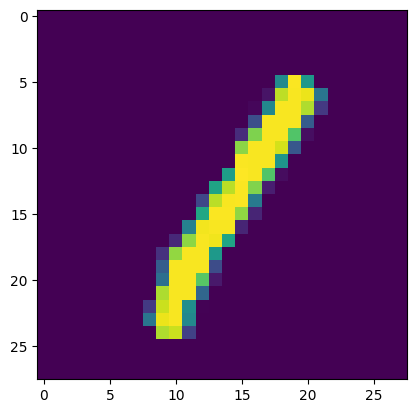

1


In [5]:
# display the image
plt.imshow(x_train[23])
plt.show()
# print the corresponding label
print(y_train[23])

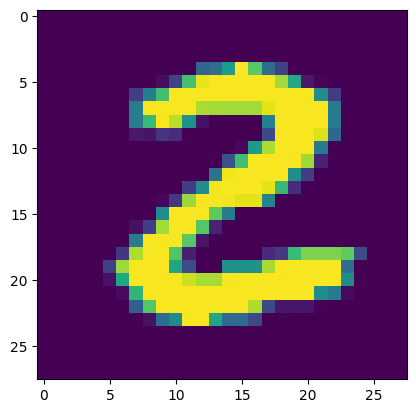

2


In [6]:
# display the image
plt.imshow(x_train[25])
plt.show()
# print the corresponding label
print(y_train[25])

In [7]:
# unique values in y_train
print(np.unique(y_train))
# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## Scaling the Images

In [8]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
# scaling the values
x_train = x_train/255
x_test = x_test/255

In [10]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Building Neural Network

In [11]:
# setting up the layers
model = keras.Sequential([
                 keras.layers.Flatten(input_shape=(28,28)),
                 keras.layers.Dense(50, activation = 'relu'),
                 keras.layers.Dense(50, activation = 'relu'),
                 keras.layers.Dense(10, activation = 'sigmoid')
])

In [12]:
# compiling the NN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
# training the neural network
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3002 - accuracy: 0.9144
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1417 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1065 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0715 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0619 - accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9844
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0418 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.037

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1066 - accuracy: 0.9715


* Training Data Accuracy = 99%
* Testing Data Accuracy = 97%

In [15]:
print(x_test.shape)

(10000, 28, 28)


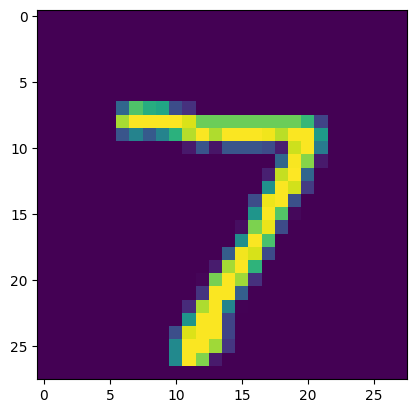

In [16]:
# display the image
plt.imshow(x_test[0])
plt.show()

In [17]:
# print the corresponding label
print(y_test[0])

7


In [18]:
y_predict = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [19]:
print(y_predict.shape)

(10000, 10)


In [20]:
print(y_predict[0])

[4.5031987e-02 7.5948494e-03 3.9846024e-01 7.3101348e-01 2.1478388e-06
 4.3985533e-04 2.0911388e-08 9.9998772e-01 1.7054444e-02 2.4063830e-01]


In [21]:
# Converting the prediction probability into class labels
y_pred_label = [np.argmax(i) for i in y_predict]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

## Confusion Matrix

In [22]:
confusion_mat = confusion_matrix(y_test, y_pred_label)

In [23]:
print(confusion_mat)

tf.Tensor(
[[ 960    0    1    3    1    5    5    1    4    0]
 [   0 1122    3    3    0    2    2    1    2    0]
 [   2    1 1001    2    4    3    5    3   10    1]
 [   0    0    3  988    1    8    0    3    5    2]
 [   0    0    2    2  960    0    6    1    0   11]
 [   2    0    0   20    2  858    1    0    7    2]
 [   3    1    2    1    5    8  935    0    3    0]
 [   1    5    9    6    0    0    1  989    3   14]
 [   1    0    3   10    4   11    1    2  937    5]
 [   3    3    0    8   18    3    0    2    7  965]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

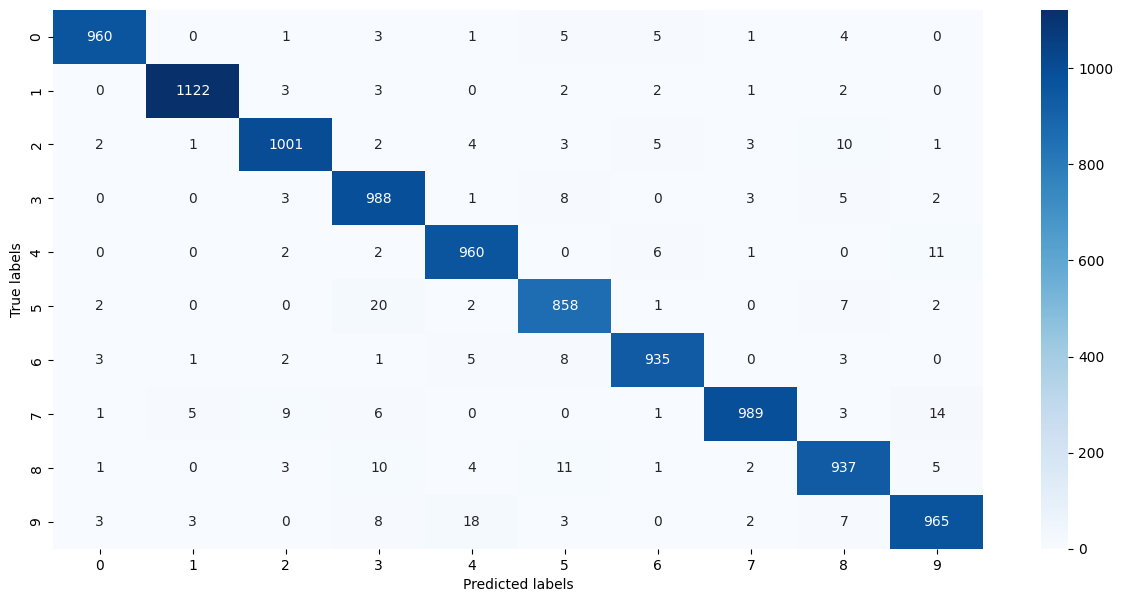

In [24]:
# heat map 
plt.figure(figsize = (15,7))
sns.heatmap(confusion_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

## Building Predictive System

In [25]:
input_img_path = 'mnist_image.png'
input_img = cv2.imread(input_img_path)

In [26]:
type(input_img)

numpy.ndarray

In [27]:
print(input_img.shape)

(1480, 1490, 3)


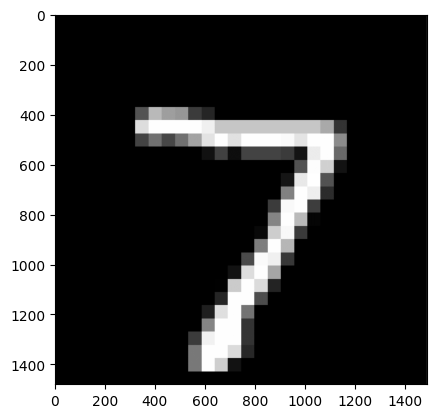

In [28]:
# display the input image
plt.imshow(input_img)
plt.show()

In [29]:
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [30]:
# resize the input image
input_image_resize = cv2.resize(grayscale, (28,28))

In [31]:
print(input_image_resize.shape)

(28, 28)


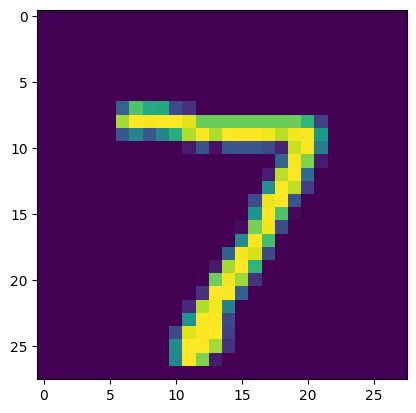

In [32]:
# display the input image
plt.imshow(input_image_resize)
plt.show()

In [33]:
# scaling the input image
input_image_resize = input_image_resize/255

In [34]:
# reshaping the input image
reshape_image = np.reshape(input_image_resize, [1,28,28])

In [35]:
input_pred = model.predict(reshape_image)
print(input_pred)

1/1 [==============================] - 0s 23ms/step
[[4.3804720e-02 7.5604282e-03 3.9616758e-01 7.3616213e-01 2.2359368e-06
  4.5611043e-04 2.1246082e-08 9.9998760e-01 1.6532201e-02 2.3846014e-01]]


In [37]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

7


## Predictive System

Path of the image:mnist_image.png


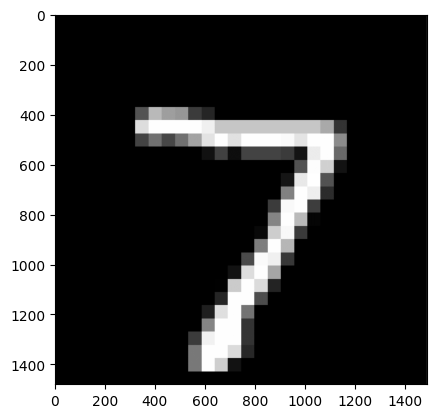

1/1 [==============================] - 0s 13ms/step
The Handwritten Digit is recognized as:  7


In [41]:
input_img_path = input('Path of the image:')
input_img = cv2.imread(input_img_path)
# display the input image
plt.imshow(input_img)
plt.show()
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
# resize the input image
input_image_resize = cv2.resize(grayscale, (28,28))
# scaling the input image
input_image_resize = input_image_resize/255
# reshaping the input image
reshape_image = np.reshape(input_image_resize, [1,28,28])
input_pred = model.predict(reshape_image)
input_pred_label = np.argmax(input_pred)
print('The Handwritten Digit is recognized as: ',input_pred_label)